# **Big Data Analytics using IDS Dataset**

**Big Data Analytics Project with Pyspark:**

**Hence we used to Create Spark SQL Queries and Pandas,Matplot Libraries for Visualization of Datas.We are used Pyspark for analyse and interpret data with Descriptive statistics,Correlation between the data,Hypothesis Testing the data,Covariance and Density estimation using Pyspark. Hence we Used Machine Learning Models for achievement.**


# **Initiate and Configure Spark**

---


In [1]:
#Installing Pyspark
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Big Data Analytics').getOrCreate()


# **Load Data**

---


In [3]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load Data
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv")

In [5]:
# Print Dataframe
IDS_df.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------------

In [6]:
# The total number of attacks per label
IDS_df.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|5329908|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
+--------------------+-------+



In [7]:
#Create dataframe as a SQL Temporary view to create Spark SQL Queries
IDS_df.createOrReplaceTempView("IDS2018")


# **Analyzing using Spark SQL**

---



In [8]:
# Query 1: We are listing the different types of benign attacks (using <> 'Benign') .

sqlDF = spark.sql("SELECT Label AS CyberAttackName, count(*) AS CyberAttacksCount FROM IDS2018 GROUP BY Label")
sqlDF.show()

+--------------------+-----------------+
|     CyberAttackName|CyberAttacksCount|
+--------------------+-----------------+
|      SSH-Bruteforce|           187589|
|              Benign|          5329908|
|      FTP-BruteForce|           193360|
|DoS attacks-Slowl...|            10990|
|DoS attacks-Golde...|            41508|
|DoS attacks-SlowH...|           139890|
|    DoS attacks-Hulk|           461912|
|DDOS attack-LOIC-UDP|             1730|
|    DDOS attack-HOIC|           686012|
|       SQL Injection|               87|
|    Brute Force -XSS|              230|
|    Brute Force -Web|              611|
|                 Bot|           286191|
+--------------------+-----------------+



In [9]:
#Convert Sql dataframe to pandas dataframe
pandas_df = sqlDF.toPandas()

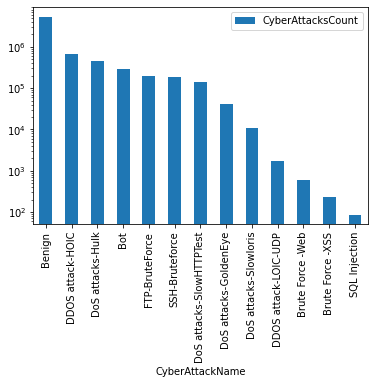

In [10]:
#Bar chart Visualization
pandas_df.sort_values(by='CyberAttacksCount',ascending=False).plot(x ='CyberAttackName',y='CyberAttacksCount',kind = 'bar',logy=True)

In [11]:
# Query 2: Finding the computer port effected by all the cyber-attack happened (in last 7 Months - Top 10) 
sqlDF= spark.sql("SELECT `Dst Port` AS Port, Label AS PortAfectedBy, count(*) AS NumberOfTimeAffected FROM IDS2018 GROUP BY port, PortAfectedBy order by NumberOfTimeAffected desc;")
sqlDF.show(5)


+----+----------------+--------------------+
|Port|   PortAfectedBy|NumberOfTimeAffected|
+----+----------------+--------------------+
|  53|          Benign|             1294710|
|  80|          Benign|              790199|
|  80|DDOS attack-HOIC|              686012|
|3389|          Benign|              655555|
| 443|          Benign|              609185|
+----+----------------+--------------------+
only showing top 5 rows



In [12]:
pandas_df = sqlDF.toPandas()

In [13]:
import seaborn as sns

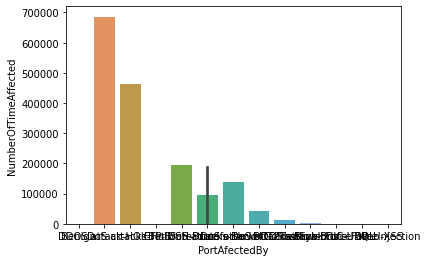

In [14]:
sns.barplot(x='PortAfectedBy',y='NumberOfTimeAffected',data=pandas_df)

In [15]:
# Query 3: Finding the computer port effected by all the cyber-attack happened (in last 6 Months) - Top 5
sqlDF= spark.sql("SELECT 'Dst Port' AS Port, Label AS PortAfectedBy, count(*) AS NumberOfTimeAffected FROM IDS2018 GROUP BY port, PortAfectedBy order BY NumberOfTimeAffected desc;")
sqlDF.show()


+--------+--------------------+--------------------+
|    Port|       PortAfectedBy|NumberOfTimeAffected|
+--------+--------------------+--------------------+
|Dst Port|              Benign|             5329908|
|Dst Port|    DDOS attack-HOIC|              686012|
|Dst Port|    DoS attacks-Hulk|              461912|
|Dst Port|                 Bot|              286191|
|Dst Port|      FTP-BruteForce|              193360|
|Dst Port|      SSH-Bruteforce|              187589|
|Dst Port|DoS attacks-SlowH...|              139890|
|Dst Port|DoS attacks-Golde...|               41508|
|Dst Port|DoS attacks-Slowl...|               10990|
|Dst Port|DDOS attack-LOIC-UDP|                1730|
|Dst Port|    Brute Force -Web|                 611|
|Dst Port|    Brute Force -XSS|                 230|
|Dst Port|       SQL Injection|                  87|
+--------+--------------------+--------------------+



In [16]:
#Convert SQL dataframe into pandas
pandas_df = sqlDF.toPandas()

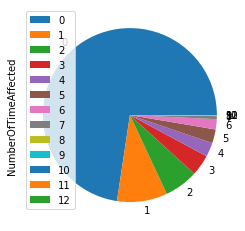

In [17]:
#Matplotlibrary for plotting
pandas_df.plot(x ='PortAfectedBy', y='NumberOfTimeAffected', kind = 'pie')

In [18]:
# Query 4: Finding the total duration of each cyber-attack and Sum of Total_Duration of attacks  (in last 6 Months)
sqlDF= spark.sql("SELECT first(Label) AS `Cyber-Attack`, sum(`Flow Duration`)  AS Total_Duration FROM IDS2018 GROUP BY `Label` order by Total_Duration desc;")
sqlDF.show()


+--------------------+------------------+
|        Cyber-Attack|    Total_Duration|
+--------------------+------------------+
|              Benign|7.0213497175711E13|
|DoS attacks-Slowl...|  7.91063895605E11|
|DoS attacks-Golde...|  4.66277648662E11|
|DDOS attack-LOIC-UDP|  2.00711432887E11|
|    DoS attacks-Hulk|  1.39384537921E11|
|      SSH-Bruteforce|   3.4394383592E10|
|    Brute Force -Web|    2.165463703E10|
|                 Bot|   2.1549869953E10|
|    DDOS attack-HOIC|     6.668259505E9|
|    Brute Force -XSS|       6.5924205E9|
|       SQL Injection|      2.88468243E8|
|      FTP-BruteForce|          735386.0|
|DoS attacks-SlowH...|          685445.0|
+--------------------+------------------+



In [19]:
pandas_df = sqlDF.toPandas()

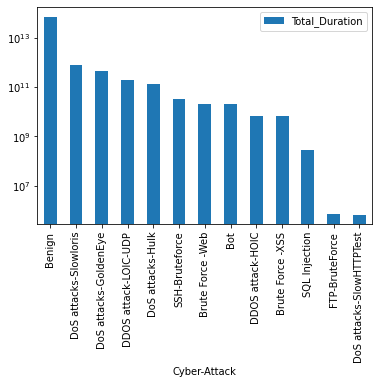

In [20]:
pandas_df.sort_values(by='Total_Duration',ascending=False).plot(x ='Cyber-Attack', y='Total_Duration', kind = 'bar',logy=True)

In [21]:
# Query 5: Finding the most used computer port used by all the cyber-attack happened (in last 6 Months)
sqlDF = spark.sql("SELECT `Dst Port` AS Port, Label as PortAfectedBy, count(`Dst Port`) AS NumberOfTimeAffected FROM IDS2018 GROUP BY port, PortAfectedBy order by NumberOfTimeAffected desc limit 2;")
sqlDF.show()


+----+-------------+--------------------+
|Port|PortAfectedBy|NumberOfTimeAffected|
+----+-------------+--------------------+
|  53|       Benign|             1294710|
|  80|       Benign|              790199|
+----+-------------+--------------------+



In [22]:
#Transform SQL dataframe to pandas
pandas_df = sqlDF.toPandas()

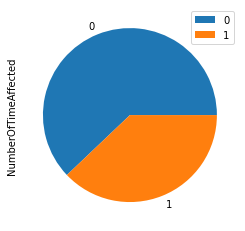

In [23]:
#Plot using matplotlibrary
pandas_df.plot(x ='PortAfectedBy', y='NumberOfTimeAffected', kind = 'pie')

In [24]:
# Query 6:Finding the cyber-attack with the help of the bots happened (in last 6 Months)
sqlDF = spark.sql("SELECT first(Label) AS `Cyber-Attack`,Count(Label) AS Total_Duration FROM IDS2018 GROUP BY `Label` having Label =='Bot';")
sqlDF.show()


+------------+--------------+
|Cyber-Attack|Total_Duration|
+------------+--------------+
|         Bot|        286191|
+------------+--------------+



In [25]:
pandas_df=sqlDF.toPandas()

In [26]:
import seaborn as sns

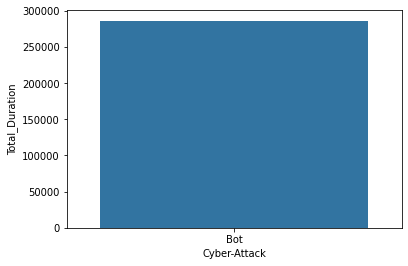

In [27]:
sns.barplot(x='Cyber-Attack',y='Total_Duration',data=pandas_df)

In [28]:
# Query 7: Finding the port least effected by all the cyber-attack happened (in last 6 Months)
sqlDF = spark.sql("SELECT `Dst Port` AS Port, Label AS PortAffectedBy, count(`Dst Port`) AS NumberOfTimeAffected FROM IDS2018 GROUP BY port, PortAffectedBy order by NumberOfTimeAffected asc limit 5;")
sqlDF.show()


+-----+--------------+--------------------+
| Port|PortAffectedBy|NumberOfTimeAffected|
+-----+--------------+--------------------+
|46761|        Benign|                   1|
|  195|        Benign|                   1|
|  133|        Benign|                   1|
|26239|        Benign|                   1|
|  198|        Benign|                   1|
+-----+--------------+--------------------+



**To Visualize the Dataframe in Graphical we need to use the Required Libraries**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Convert SQL Dataframe into Pandas Dataframe to plot Visually**

In [30]:
pandas_df = sqlDF.toPandas()

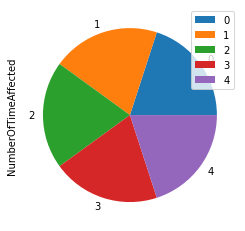

In [31]:
pandas_df.plot(x ='PortAffectedBy', y='NumberOfTimeAffected', kind = 'pie')

In [32]:
# Query 8: Most number of attacks recorded on 16/02/2018 with the highest of nearly 8000 attacks

sqlDF = spark.sql("SELECT Timestamp, count(*) from IDS2018 GROUP BY Timestamp HAVING count(*)>8000")
sqlDF.show()


+-------------------+--------+
|          Timestamp|count(1)|
+-------------------+--------+
|16/02/2018 01:45:31|    8014|
|16/02/2018 01:45:30|    8056|
|16/02/2018 01:45:32|    8054|
|16/02/2018 01:45:28|    8403|
|16/02/2018 01:45:29|    8205|
+-------------------+--------+



In [33]:
pandas_df=sqlDF.toPandas()

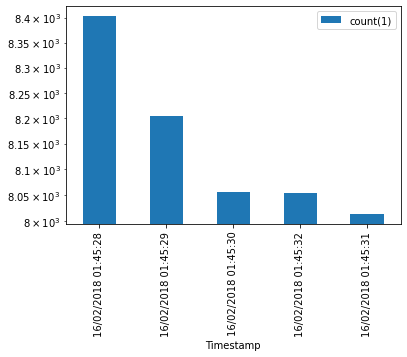

In [34]:
pandas_df.sort_values(by='count(1)', ascending=False).plot(x='Timestamp', y='count(1)', kind='bar',logy=True)


# **Analysis using PySpark**

---


In [35]:
# Analytical method 1: Five number summary for Destination port and Download and Upload Ratio to Calculate Quartiles and Find the Minimum and Maximum Value
#Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
#Load the data
ids_df=pd.read_csv("/content/drive/MyDrive/IDS2018/02-14-2018.csv")
ids_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [37]:
#Convert into Dataframe
ids_df1=pd.DataFrame(ids_df,columns=['Dst Port','Down/Up Ratio'])
ids_df1

,Dst Port,Down/Up Ratio
0,0,0
1,0,0
2,0,0
3,22,0
4,22,0
...,...,...
1048570,80,1
1048571,80,0
1048572,80,0
1048573,80,0


In [38]:
ids_df1.describe()

,Dst Port,Down/Up Ratio
count,1.048575e+06,1.048575e+06
mean,4.876262e+03,6.634537e-01
std,1.444344e+04,5.652833e-01
min,0.000000e+00,0.000000e+00
25%,2.200000e+01,0.000000e+00
50%,5.300000e+01,1.000000e+00
75%,4.430000e+02,1.000000e+00
max,6.553300e+04,8.000000e+01


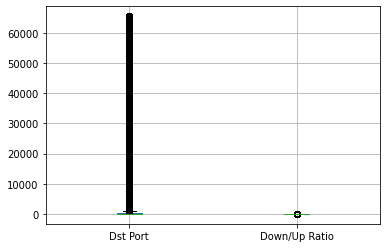

In [39]:
#Boxplot with Dataframe
boxplot=ids_df1.boxplot()

In [40]:
#Calculate 5 number summary for Dst Port:
five_number = [ids_df1["Dst Port"].quantile(0),
              ids_df1["Dst Port"].quantile(0.25),
              ids_df1["Dst Port"].quantile(0.5),
              ids_df1["Dst Port"].quantile(0.75),
              ids_df1["Dst Port"].quantile(1)]

In [41]:
five_number

[0.0, 22.0, 53.0, 443.0, 65533.0]

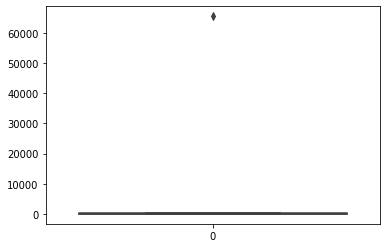

In [42]:
#Plot using seaborn
sns.boxplot(data=five_number)

In [43]:
#Calculate 5 number summary for Download and upload ratio:
five_number1 =[ids_df1["Down/Up Ratio"].quantile(0),
              ids_df1["Down/Up Ratio"].quantile(0.25),
              ids_df1["Down/Up Ratio"].quantile(0.5),
              ids_df1["Down/Up Ratio"].quantile(0.75),
              ids_df1["Down/Up Ratio"].quantile(1)]

In [44]:
five_number1

[0.0, 0.0, 1.0, 1.0, 80.0]

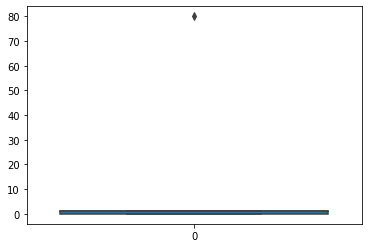

In [45]:
#Boxplot with dataframe
sns.boxplot(data=five_number1)

In [46]:
# Analytical method 2: Exploratory data analysis of Covariance and correlation between maximum and minimum time between two flows
import numpy as np
import pandas as pd
import seaborn as sns

In [47]:
#Load the dataset
IDS = pd.read_csv("/content/drive/MyDrive/IDS2018/02-14-2018.csv")

In [48]:
#Display the dataset
IDS

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [49]:
#Load Dataframe with featured columns
IDS_pd = pd.DataFrame(IDS,columns=['Flow IAT Max','Flow IAT Min'])

In [50]:
#Calculate covariance
covariance=IDS_pd.cov()

In [51]:
#Display the content
covariance

,Flow IAT Max,Flow IAT Min
Flow IAT Max,2.341283e+18,-2.286718e+18
Flow IAT Min,-2.286718e+18,2.692243e+18


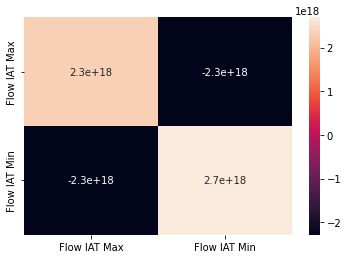

In [52]:
#Using heatmap
sns.heatmap(covariance,xticklabels=covariance.columns,yticklabels=covariance.columns,annot=True)

In [53]:
correlation=IDS_pd.corr()

In [54]:
correlation

,Flow IAT Max,Flow IAT Min
Flow IAT Max,1.000000,-0.910812
Flow IAT Min,-0.910812,1.000000


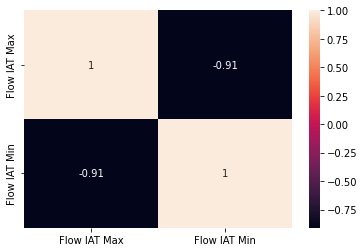

In [55]:
#Visualization using seaborn
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [56]:
# Analytical method 3: Hypothesis Testing method for testing the Mean size of packets in the backward direction are Normal Distribution or not

#Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [57]:
#Load the CSV file
Ids2018_df=pd.read_csv("/content/drive/MyDrive/IDS2018/02-14-2018.csv")
Ids2018_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [58]:
#Create Dataframe with the Required columns
Ids2018_df1=pd.DataFrame(Ids2018_df,columns=['Bwd Pkt Len Mean'])
Ids2018_df1

,Bwd Pkt Len Mean
0,0.000000
1,0.000000
2,0.000000
3,227.300000
4,200.818182
...,...
1048570,384.600000
1048571,0.000000
1048572,0.000000
1048573,0.000000


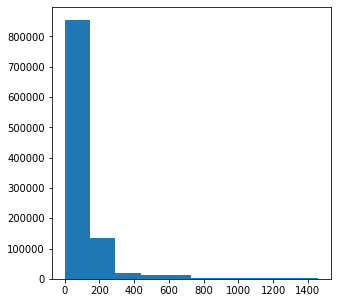

In [59]:
#Plot using matplot library
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(5,5))
pyplot.hist(Ids2018_df['Bwd Pkt Len Mean'])
pyplot.show()

In [60]:
#Using normal Test
from scipy.stats import normaltest
TestingData= Ids2018_df['Bwd Pkt Len Mean']
stat, p=normaltest(TestingData)
print('stat=%.2f, p=%.30f'%(stat,p))
if p>0.5:
  print('Normal')
else:
  print('Not Normally Distributed')

stat=844167.77, p=0.000000000000000000000000000000
Not Normally Distributed


In [61]:
# Analytical method 4: Calculate Mean,Median and Mode for Subflow forward and backward packets
#Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
#Read CSV file
ids_df=pd.read_csv("/content/drive/MyDrive/IDS2018/02-14-2018.csv")
ids_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [63]:
#Convert into Dataframe with required columns
ids_df1=pd.DataFrame(ids_df,columns=['Subflow Fwd Pkts','Subflow Bwd Pkts'])
ids_df1

,Subflow Fwd Pkts,Subflow Bwd Pkts
0,3,0
1,3,0
2,3,0
3,15,10
4,14,11
...,...,...
1048570,5,5
1048571,2,0
1048572,3,1
1048573,3,1


In [64]:
#Calculate mean
ids_df1["Subflow Fwd Pkts"].mean()

6.206622320768663

In [65]:
#Calculate median
ids_df1["Subflow Fwd Pkts"].median()

2.0

In [66]:
#Calculate mode
ids_df1["Subflow Fwd Pkts"].mode()

0    1
dtype: int64

In [67]:
#For Visualization using matplotlibrary
import matplotlib.pyplot as plt


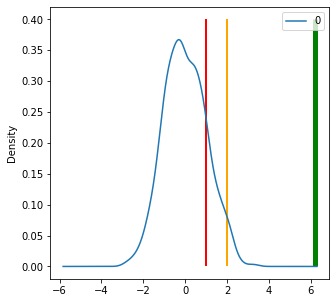

In [68]:
#Plot the mean,median and mode for subflow forward packets visually
data=pd.DataFrame(np.random.normal(size=1000))
data.plot(kind="density",figsize=(5,5));
plt.vlines(ids_df1["Subflow Fwd Pkts"].mean(),ymin=0,ymax=0.4,linewidth=5.0,color="green");
plt.vlines(ids_df1["Subflow Fwd Pkts"].median(),ymin=0,ymax=0.4,linewidth=2.0,color="orange");
plt.vlines(ids_df1["Subflow Fwd Pkts"].mode(),ymin=0,ymax=0.4,linewidth=2.0,color="red");

In [69]:
#Calculate mean
ids_df1["Subflow Bwd Pkts"].mean()

7.211191378775958

In [70]:
#Calculate median
ids_df1["Subflow Bwd Pkts"].median()

1.0

In [71]:
#Calculate mode
ids_df1["Subflow Bwd Pkts"].mode()

0    1
dtype: int64

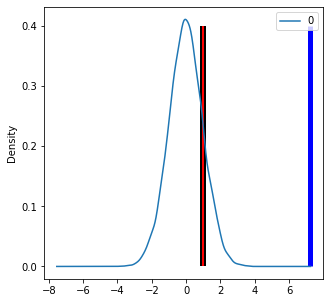

In [72]:
#Plot the mean,median and mode for subflow backward packets visually
data=pd.DataFrame(np.random.normal(size=10000))
data.plot(kind="density",figsize=(5,5));
plt.vlines(ids_df1["Subflow Bwd Pkts"].mean(),ymin=0,ymax=0.4,linewidth=5.0,color="blue");
plt.vlines(ids_df1["Subflow Bwd Pkts"].median(),ymin=0,ymax=0.4,linewidth=6.0,color="black");
plt.vlines(ids_df1["Subflow Bwd Pkts"].mode(),ymin=0,ymax=0.4,linewidth=2.0,color="red");

In [73]:
# Analytical method 5: Correlation Between Maximum,Minimum and Average Size of packets in the Forward Direction to Total Size of Packets in Forward direction.
from pyspark.ml.stat import Correlation

In [74]:
#Convert String Character into Float or int Using col function
from pyspark.sql.functions import col
selected_col = ['Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','TotLen Fwd Pkts']
IDS_selected_columns_df = IDS_df.select(*(col(c).cast("float").alias(c) for c in selected_col))

In [75]:
IDS_selected_columns_df.corr("Fwd Pkt Len Max","TotLen Fwd Pkts")

0.0347031463513535

In [76]:
IDS_selected_columns_df.corr("Fwd Pkt Len Min","TotLen Fwd Pkts")

0.015155313434673585

In [77]:
IDS_selected_columns_df.corr("Fwd Pkt Len Mean","TotLen Fwd Pkts")

0.04091507227395353

In [78]:
IDS_selected_columns_df.corr("Fwd Pkt Len Max","Fwd Pkt Len Min")


-0.18122981723073042

In [79]:
IDS_selected_columns_df.corr("Fwd Pkt Len Max","Fwd Pkt Len Mean")

0.9127232274615125

In [80]:
IDS_selected_columns_df.corr("TotLen Fwd Pkts","TotLen Fwd Pkts")

1.0

**To calculate Correlation in Dataframe**

In [81]:
#Create Vector Assembler to merge multiple column into vector column
from pyspark.ml.feature import VectorAssembler
vector_col ="correlation-features"
columns=['Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','TotLen Fwd Pkts']

In [82]:
#Make an object assembler and create class vector assembler
assembler=VectorAssembler(inputCols=columns,outputCol=vector_col)

In [83]:
#Tranform the Dataframe
df_vector=assembler.transform(IDS_selected_columns_df).select(vector_col)
df_vector

DataFrame[correlation-features: vector]

**To create Correlation Matrix**

In [84]:
#Dense matrix creation
matrix=Correlation.corr(df_vector,vector_col).collect()[0][0]
Correlation.corr(df_vector,vector_col).collect()[0][0]

DenseMatrix(4, 4, [1.0, -0.1812, 0.9127, 0.0347, -0.1812, 1.0, 0.068, 0.0152, 0.9127, 0.068, 1.0, 0.0409, 0.0347, 0.0152, 0.0409, 1.0], False)

In [85]:
#Convert this matrix into Array and Make list
correlationmatrix=matrix.toArray().tolist()
print(correlationmatrix)

[[1.0, -0.18122981723089798, 0.9127232274625791, 0.03470314635101149], [-0.18122981723089798, 1.0, 0.06798463196496148, 0.015155313434567741], [0.9127232274625791, 0.06798463196496148, 1.0, 0.04091507227371828], [0.03470314635101149, 0.015155313434567741, 0.04091507227371828, 1.0]]


In [86]:
#Convert this Array into Dataframe 
df_corr=spark.createDataFrame(correlationmatrix,columns)
df_corr.show()

+--------------------+--------------------+-------------------+--------------------+
|     Fwd Pkt Len Max|     Fwd Pkt Len Min|   Fwd Pkt Len Mean|     TotLen Fwd Pkts|
+--------------------+--------------------+-------------------+--------------------+
|                 1.0|-0.18122981723089798| 0.9127232274625791| 0.03470314635101149|
|-0.18122981723089798|                 1.0|0.06798463196496148|0.015155313434567741|
|  0.9127232274625791| 0.06798463196496148|                1.0| 0.04091507227371828|
| 0.03470314635101149|0.015155313434567741|0.04091507227371828|                 1.0|
+--------------------+--------------------+-------------------+--------------------+



In [87]:
#Import required Libraries
import seaborn as sns
import pandas as pd

**Convert Correlation Dataframe to pandas Dataframe for visualization**

In [88]:
pandas_df=df_corr.toPandas()

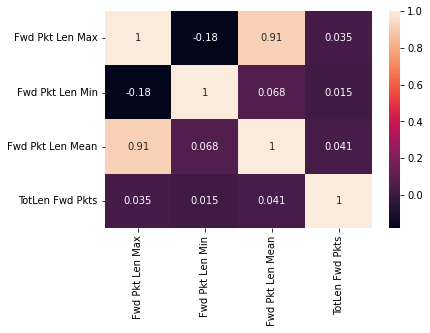

In [89]:
#Display the correlation in heatmap
sns.heatmap(pandas_df,xticklabels=pandas_df.columns,yticklabels=pandas_df.columns,annot=True)


# **Machine Learning using PySpark**

---


In [90]:
# Machine Learning Technique 1: Multi Class classification Evaluator
# What to achieve: TO Predict Accuracy score 
#Create dataframe with required columns
df = IDS_df.select('Dst Port','Protocol','Label','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts')

In [91]:
#Using vector assembler converts multiple vector to single vector
from pyspark.ml.feature import VectorAssembler,StringIndexer

In [92]:
#Convert string into numerical
Proto_enc =StringIndexer(inputCol='Protocol',outputCol='Protocol_type').fit(df)

In [93]:
#Transform into dataframe
df = Proto_enc.transform(df)

In [94]:
df.show(5)

+--------+--------+------+-------------+------------+------------+-------------+
|Dst Port|Protocol| Label|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol_type|
+--------+--------+------+-------------+------------+------------+-------------+
|       0|       0|Benign|    112641719|           3|           0|          2.0|
|       0|       0|Benign|    112641466|           3|           0|          2.0|
|       0|       0|Benign|    112638623|           3|           0|          2.0|
|      22|       6|Benign|      6453966|          15|          10|          0.0|
|      22|       6|Benign|      8804066|          14|          11|          0.0|
+--------+--------+------+-------------+------------+------------+-------------+
only showing top 5 rows



In [95]:
#Encoding for labels
cat_enc = StringIndexer(inputCol='Label',outputCol='Target').fit(df)

In [96]:
#Transform the dataframe
df = cat_enc.transform(df)

In [97]:
df.show(5)

+--------+--------+------+-------------+------------+------------+-------------+------+
|Dst Port|Protocol| Label|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol_type|Target|
+--------+--------+------+-------------+------------+------------+-------------+------+
|       0|       0|Benign|    112641719|           3|           0|          2.0|   0.0|
|       0|       0|Benign|    112641466|           3|           0|          2.0|   0.0|
|       0|       0|Benign|    112638623|           3|           0|          2.0|   0.0|
|      22|       6|Benign|      6453966|          15|          10|          0.0|   0.0|
|      22|       6|Benign|      8804066|          14|          11|          0.0|   0.0|
+--------+--------+------+-------------+------------+------------+-------------+------+
only showing top 5 rows



In [98]:
#Convert index into string
from pyspark.ml.feature import IndexToString

In [99]:
convert = IndexToString(inputCol='Target',outputCol='original')

In [100]:
#Transfer to dataframe
converted = convert.transform(df)

In [101]:
#Display the content
converted.show()

+--------+--------+------+-------------+------------+------------+-------------+------+--------+
|Dst Port|Protocol| Label|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol_type|Target|original|
+--------+--------+------+-------------+------------+------------+-------------+------+--------+
|       0|       0|Benign|    112641719|           3|           0|          2.0|   0.0|  Benign|
|       0|       0|Benign|    112641466|           3|           0|          2.0|   0.0|  Benign|
|       0|       0|Benign|    112638623|           3|           0|          2.0|   0.0|  Benign|
|      22|       6|Benign|      6453966|          15|          10|          0.0|   0.0|  Benign|
|      22|       6|Benign|      8804066|          14|          11|          0.0|   0.0|  Benign|
|      22|       6|Benign|      6989341|          16|          12|          0.0|   0.0|  Benign|
|       0|       0|Benign|    112640480|           3|           0|          2.0|   0.0|  Benign|
|       0|       0|Benign|    

In [102]:
df2=df.select('Dst Port', 'Protocol', 'Label', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Protocol_type', 'Target')

In [103]:
#Print the characters of the dataset
df2.printSchema()

root
 |-- Dst Port: string (nullable = true)
 |-- Protocol: string (nullable = true)
 |-- Label: string (nullable = true)
 |-- Flow Duration: string (nullable = true)
 |-- Tot Fwd Pkts: string (nullable = true)
 |-- Tot Bwd Pkts: string (nullable = true)
 |-- Protocol_type: double (nullable = false)
 |-- Target: double (nullable = false)



In [104]:
#Convert string characters into numerical values
from pyspark.sql.functions import col

selected_feat = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Protocol_type', 'Target']
df2 = df.select(*(col(c).cast("double").alias(c) for c in selected_feat))

In [105]:
#Take necessary columns
required_feat =['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Protocol_type', 'Target']

In [106]:
#Create vector assembler
vec_assembler = VectorAssembler(inputCols=required_feat,outputCol='features')

In [107]:
#Tranform into dataframe
vector_df = vec_assembler.transform(df2)

In [108]:
vector_df.show(5)

+--------+--------+-------------+------------+------------+-------------+------+--------------------+
|Dst Port|Protocol|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol_type|Target|            features|
+--------+--------+-------------+------------+------------+-------------+------+--------------------+
|     0.0|     0.0| 1.12641719E8|         3.0|         0.0|          2.0|   0.0|(7,[2,3,5],[1.126...|
|     0.0|     0.0| 1.12641466E8|         3.0|         0.0|          2.0|   0.0|(7,[2,3,5],[1.126...|
|     0.0|     0.0| 1.12638623E8|         3.0|         0.0|          2.0|   0.0|(7,[2,3,5],[1.126...|
|    22.0|     6.0|    6453966.0|        15.0|        10.0|          0.0|   0.0|[22.0,6.0,6453966...|
|    22.0|     6.0|    8804066.0|        14.0|        11.0|          0.0|   0.0|[22.0,6.0,8804066...|
+--------+--------+-------------+------------+------------+-------------+------+--------------------+
only showing top 5 rows



**To Train and Testing the Data**

In [109]:
(training,testing)=vector_df.randomSplit([0.7,0.3])

In [110]:
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier

In [111]:
logreg =LogisticRegression(featuresCol='features',labelCol='Target')

In [112]:
logreg_model = logreg.fit(training)

In [113]:
#Testing data
prediction_model = logreg_model.transform(testing)

In [114]:
#Display the predicting model
prediction_model.show()

+--------+--------+-------------+------------+------------+-------------+------+--------------------+--------------------+--------------------+----------+
|Dst Port|Protocol|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol_type|Target|            features|       rawPrediction|         probability|prediction|
+--------+--------+-------------+------------+------------+-------------+------+--------------------+--------------------+--------------------+----------+
|     0.0|     0.0|        128.0|         1.0|         1.0|          2.0|   0.0|[0.0,0.0,128.0,1....|[138.853990150814...|[1.0,4.6347485816...|       0.0|
|     0.0|     0.0|        571.0|         2.0|         0.0|          2.0|   0.0|(7,[2,3,5],[571.0...|[138.683001711242...|[1.0,5.7873794700...|       0.0|
|     0.0|     0.0|        652.0|         2.0|         0.0|          2.0|   0.0|(7,[2,3,5],[652.0...|[138.683000567999...|[1.0,5.7873870376...|       0.0|
|     0.0|     0.0|        704.0|         2.0|         0.0|          2

In [115]:
#Select required columns 
prediction_model.select('Target','rawPrediction','probability','prediction').show(5)

+------+--------------------+--------------------+----------+
|Target|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+----------+
|   0.0|[138.853990150814...|[1.0,4.6347485816...|       0.0|
|   0.0|[138.683001711242...|[1.0,5.7873794700...|       0.0|
|   0.0|[138.683000567999...|[1.0,5.7873870376...|       0.0|
|   0.0|[138.682999834066...|[1.0,5.7873918958...|       0.0|
|   0.0|[138.682874557256...|[1.0,5.7882212141...|       0.0|
+------+--------------------+--------------------+----------+
only showing top 5 rows



In [116]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [117]:
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol='Target',metricName='accuracy')

In [118]:
#To evaluate prediction model
Final_outcomes = multiclass_evaluator.evaluate(prediction_model)

In [119]:
print(Final_outcomes) 

0.9994170430461953


In [120]:
#mllib for rdd
from pyspark.mllib.evaluation import MulticlassMetrics

In [121]:
logreg_metric = MulticlassMetrics(prediction_model['Target','prediction'].rdd)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [122]:
print("Accuracy of the model is :::",logreg_metric.accuracy)

Accuracy of the model is ::: 0.9994170430461953


In [123]:
# Machine Learning Technique 2: KMeans Clustering algorithm using Vectors
# What to achieve: For Predicting Model and Score of number of attacks occurred in the ports of the machine

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


In [124]:
#Convert String Character into Float or int Using col function
from pyspark.sql.functions import col
selected_col = ['Dst Port','Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts']
IDS_selected_columns_df1 = IDS_df.select(*(col(c).cast("float").alias(c) for c in selected_col))

In [125]:
feature_columns=['Dst Port','Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts']

In [126]:
#Merge multiple column into single using vector assembler
assembler=VectorAssembler(inputCols=feature_columns,outputCol='features')

In [127]:
#Transform the Dataframe into Final Dataframe
final_df=assembler.transform(IDS_selected_columns_df1)

In [128]:
from pyspark.ml.feature import StandardScaler

For k cluster we need data to be scaler

In [129]:
scaler=StandardScaler(inputCol='features',outputCol='scaled_feat',withStd=True,withMean=False)

In [130]:
scaled_model=scaler.fit(final_df)

In [131]:
#Transform the Final Dataframe into Cluster Dataframe
cluster_df=scaled_model.transform(final_df)

In [132]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [133]:
#Evaluating with clustering evaluator
evaluate=ClusteringEvaluator(predictionCol="prediction",featuresCol="scaled_feat",metricName="silhouette",distanceMeasure="squaredEuclidean")

In [134]:
silhouette_score=[]
print("""  
silhouette scores for K mean Clustering
---------------------------------------
model\tscore\t
======\t=====\t
""" )
for k in range(2,15):
  KMeans_algo=KMeans(featuresCol='scaled_feat',k=k)
  KMeans_fit=KMeans_algo.fit(cluster_df)
  output=KMeans_fit.transform(cluster_df)
  score=evaluate.evaluate(output)
  silhouette_score.append(score)
  print(f"k{k}\t{round(score,2)}\t")

  
silhouette scores for K mean Clustering
---------------------------------------
model	score	
======	=====	

k2	0.64	
k3	0.58	
k4	0.69	
k5	0.79	
k6	0.93	
k7	0.96	
k8	0.94	
k9	0.84	
k10	0.79	
k11	0.95	
k12	0.79	
k13	0.94	
k14	0.94	


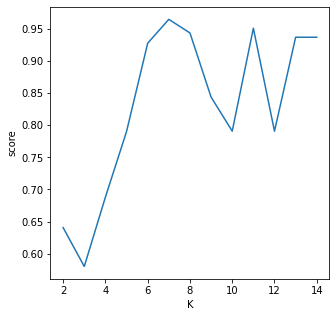

In [135]:
#Plot the table using pyplot
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(range(2,15),silhouette_score)
ax.set_xlabel("K")
ax.set_ylabel("score");